#### Demand Forecasting for a Retail Store

##### Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

##### Load the sales dataset

In [4]:
sales_data = pd.read_csv('sales_data.csv')

##### Convert the date column to datetime type

In [5]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

##### Set the Date column as the index
##### Set the Date column as the index with explicit frequency

In [6]:
sales_data.set_index('Date', inplace=True)
sales_data.index.freq = 'D'

##### Explore the data

In [7]:
print(sales_data.head())

            Sales Product Category
Date                              
2023-01-01    222      Electronics
2023-01-02     97            Books
2023-01-03    167            Books
2023-01-04    242      Electronics
2023-01-05    373      Electronics


##### Visualize the sales data

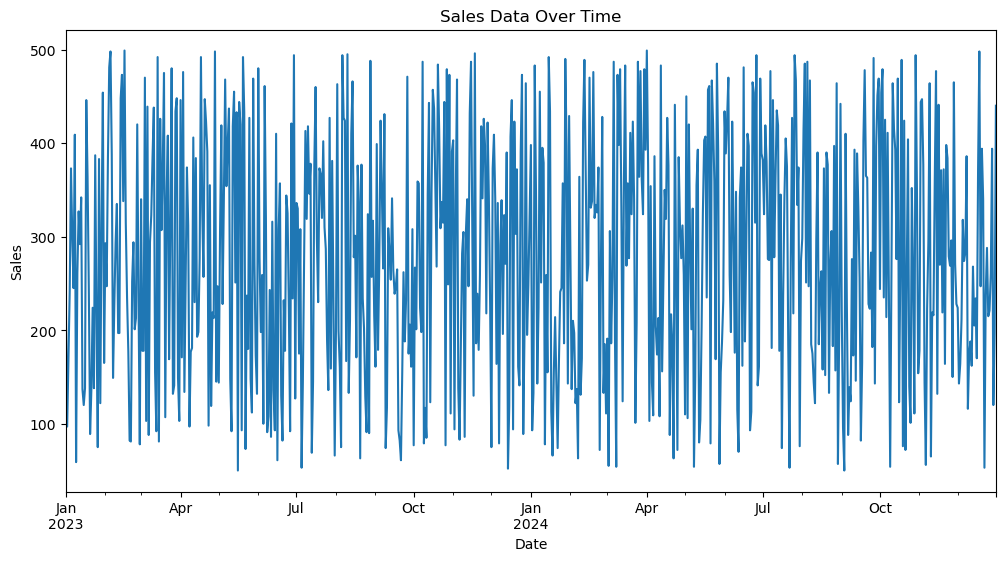

In [8]:
sales_data['Sales'].plot(figsize=(12, 6))
plt.title('Sales Data Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

##### Decompose the time series into trend, seasonality, and residuals

In [9]:
decomposition = seasonal_decompose(sales_data['Sales'], model='additive')

##### Plot the decomposed components

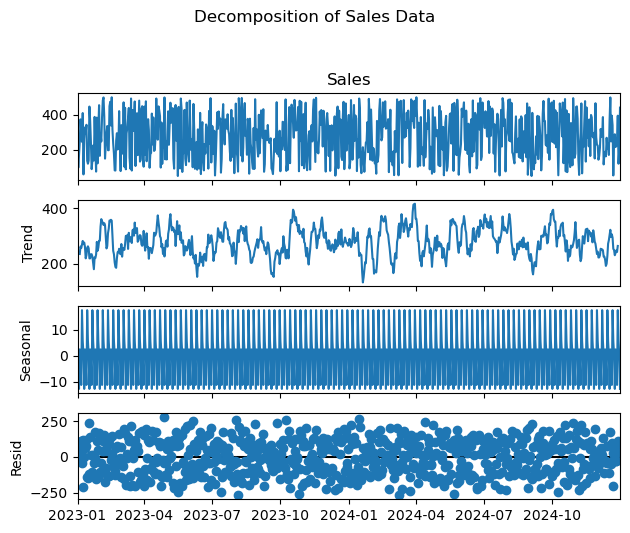

In [22]:
decomposition.plot()
plt.suptitle('Decomposition of Sales Data' , y=1.1)
plt.show()

##### Split data into train and test sets

In [17]:
train_size = int(len(sales_data) * 0.8)
train_data, test_data = sales_data.iloc[:train_size], sales_data.iloc[train_size:]

##### Build and train the forecasting model (Holt-Winters Exponential Smoothing)

In [18]:
model = ExponentialSmoothing(train_data['Sales'], seasonal='add', seasonal_periods=12).fit()

##### Forecast future demand

In [19]:
forecast = model.forecast(len(test_data))

##### Evaluate the model

In [20]:
mse = mean_squared_error(test_data['Sales'], forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 17472.58216498702


##### Visualize the forecast

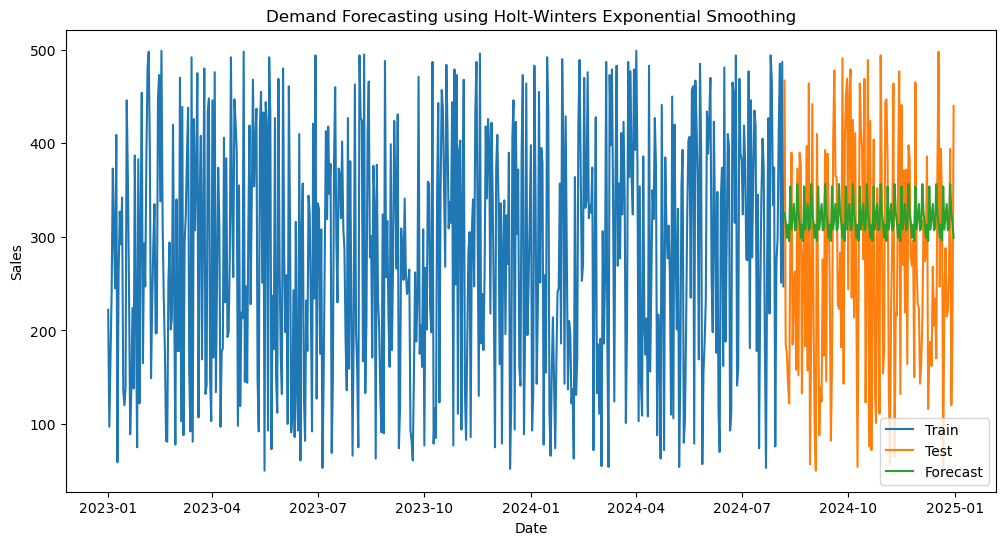

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Sales'], label='Train')
plt.plot(test_data.index, test_data['Sales'], label='Test')
plt.plot(test_data.index, forecast, label='Forecast')
plt.title('Demand Forecasting using Holt-Winters Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()